['No' 'Yes']
AGE: 71 unique values


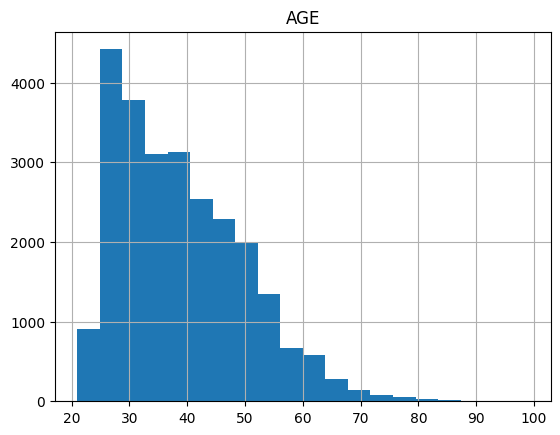

What percentage of support did you receive from the scholarship?: 97 unique values


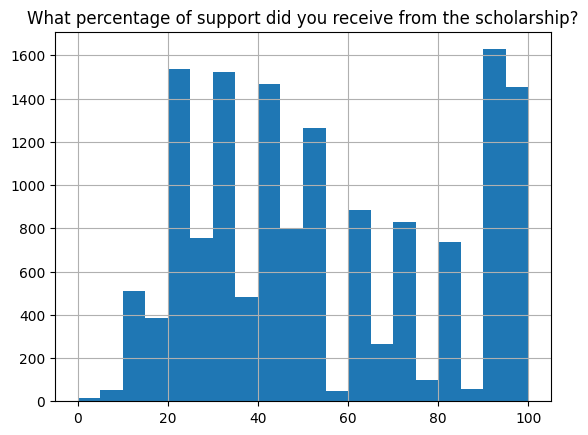

How many hours do you usually work per week?: 98 unique values


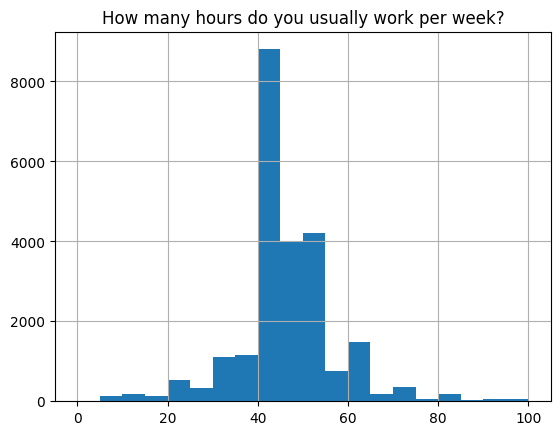

Would you please share an estimate amount of how many hours per MONTH you donate to social organizations?  hours per month: 85 unique values


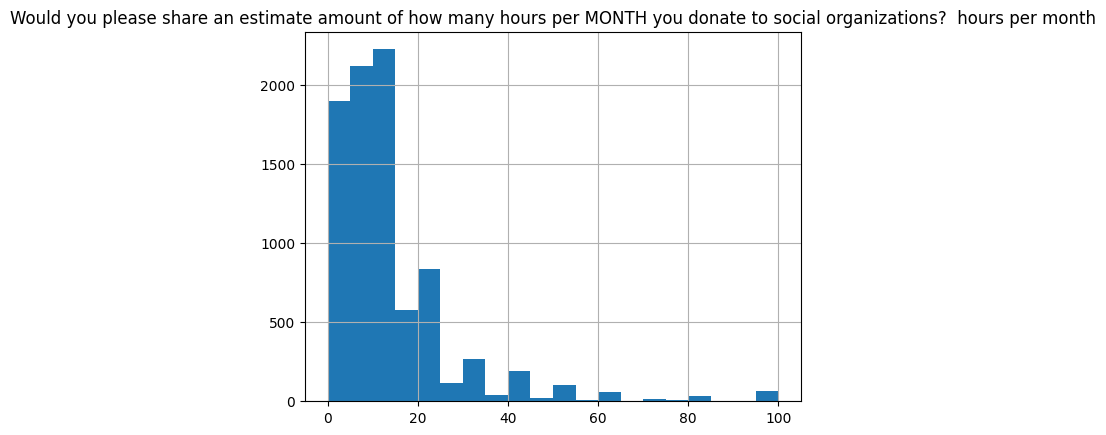

Please rate each of the following statements using the appropiare scale:  In general, how happy or unhappy do you usually feel?
 extremely unhappy:Where 1=Extremely unhappy, 10=Extremely happy: 10 unique values
Please rate each of the following statements using the appropiare scale:  Overall, how satisfied are you with life as a whole these days??
 Where 1 = Not satisfied at all, 10 = Completely Satisfied: 10 unique values
Please rate each of the following statements using the appropiare scale:  IOverall, to what extent do you feel the things you do in your life are worthwhile? 
 Where 1 is = Not at All Worthwhile, and 10 = Completely Worthwhile: 10 unique values
Please rate each of the following statements using the appropiare scale:  In general, how would you rate your physical health?
 Where 1 = Very poor physical health, 10 = excellent physical health: 10 unique values
Please rate each of the following statements using the appropiare scale:  How would you rate your overall mental h

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-26 16:17:55,993] A new study created in memory with name: no-name-b903eb25-67d6-4643-a3dd-003d8f592948
[I 2025-05-26 16:18:02,449] Trial 0 finished with value: 0.23758514579800702 and parameters: {'iterations': 209, 'depth': 9, 'learning_rate': 0.2582744437775849, 'l2_leaf_reg': 0.011762587212341573, 'scale_pos_weight': 53.03473044585455}. Best is trial 0 with value: 0.23758514579800702.
[I 2025-05-26 16:18:15,191] Trial 1 finished with value: 0.24683355511971053 and parameters: {'iterations': 980, 'depth': 7, 'learning_rate': 0.2876540544583447, 'l2_leaf_reg': 0.03086889486615713, 'scale_pos_weight': 48.86014380978691}. Best is trial 1 with value: 0.24683355511971053.
[I 2025-05-26 16:18:24,694

Best params: {'iterations': 456, 'depth': 10, 'learning_rate': 0.014083992088000534, 'l2_leaf_reg': 8.46419187203661, 'scale_pos_weight': 10.118918323385998}

✅ Best Threshold for Class 1 F1: 0.58 → F1: 0.3475

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4719
           1       0.31      0.39      0.35       353

    accuracy                           0.90      5072
   macro avg       0.63      0.66      0.65      5072
weighted avg       0.91      0.90      0.90      5072

[[4411  308]
 [ 214  139]]

✅ Best Threshold for Macro F1: 0.59 → Macro F1: 0.6461

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4719
           1       0.32      0.38      0.35       353

    accuracy                           0.90      5072
   macro avg       0.64      0.66      0.65      5072
weighted avg       0.91      0.90      0.90      5072

[[4432  287]
 [ 219  134]]


NameError: name 'X_test' is not defined

In [12]:
# -*- coding: utf-8 -*-
"""RETO.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/19TGALxak7pBVG38SZ6O3K1unNczVjQl6
"""


import pandas as pd

# Carga el archivo desde tu Google Drive o súbelo directamente en Colab
file_path = '/Users/yuvan/Downloads/Data 80 aniversario study QS.xlsx'
df = pd.read_excel(file_path)
df.head()

# Renombramos la columna objetivo para facilitar el trabajo
df = df.rename(columns={
    'Since graduating from Tecnológico de Monterrey, have you founded a nonprofit organization, as part of the founding group or main founder?': 'founded_nonprofit'
})

# Ver las respuestas únicas
print(df['founded_nonprofit'].unique())

# Codificación binaria
df['founded_nonprofit_bin'] = df['founded_nonprofit'].map({
    'Yes': 1,
    'No': 0
})

label_col = df['founded_nonprofit_bin']

# Drop columns with more than 70% missing values
threshold = 0.7
df_reduced = df.loc[:, df.isnull().mean() < threshold]
df = df_reduced.copy()

low_variance_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
df = df.drop(columns=low_variance_cols)
df = df.drop(columns=['External Data Reference'])

# Separate numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

import matplotlib.pyplot as plt

# Check uniqueness
for col in num_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals > 10 and unique_vals < 100:
        df[col].hist(bins=20)
        plt.title(col)
        plt.show()

df['AGE_bucket'] = pd.cut(df['AGE'], bins=[17, 29, 39, 49, 59, 120], labels=[0, 1, 2, 3, 4])

def scholarship_bucket(x):
    if pd.isna(x):
        return 'Missing'
    elif x == 0:
        return 0
    elif x <= 25:
        return 1
    elif x <= 50:
        return 2
    elif x <= 75:
        return 3
    else:
        return 4

df['scholarship_bucket'] = df['What percentage of support did you receive from the scholarship?'].apply(scholarship_bucket)

df['work_hours_bucket'] = pd.cut(df['How many hours do you usually work per week?'],
                                 bins=[0, 20, 39, 49, 60, 100],
                                 labels=[0, 1, 2, 3, 4])

df['donation_hours_bucket'] = pd.cut(df['Would you please share an estimate amount of how many hours per MONTH you donate to social organizations?  hours per month'],
                                     bins=[-1, 0, 4, 10, 20, 100],
                                     labels=[0, 1, 2, 3, 4])

# Define Likert bucketing function
def bucket_likert(val):
    if pd.isna(val):
        return 0
    elif val <= 4:
        return 1
    elif val <= 7:
        return 2
    else:
        return 3

# List of Likert-scale columns
likert_cols = [
    col for col in df.columns
    if col.startswith('Please rate each') or col.startswith('Please rate each of the following')
]


# Apply bucketing
for col in likert_cols:
    new_col = col + ' (bucketed)'
    df[new_col] = df[col].apply(bucket_likert)
    print(str(df[new_col]))

# List of raw numeric columns used for bucketing
raw_numeric_bucket_cols = [
    'AGE',
    'What percentage of support did you receive from the scholarship?',
    'How many hours do you usually work per week?',
    'Would you please share an estimate amount of how many hours per MONTH you donate to social organizations?  hours per month'
]

# List of original Likert-scale columns
likert_raw_cols = [
    col for col in df.columns
    if (col.startswith('Please rate each') or col.startswith('Please rate each of the following'))
    and not '(bucketed)' in col
]

# Combine and drop from df_model
cols_to_drop = raw_numeric_bucket_cols + likert_raw_cols

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

for col in df.columns:
  if '(bucketed)' in col and 'rate' in col:
    print(df[col])

# Separate columns by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for target in ['founded_nonprofit', 'founded_nonprofit_bin']:
    if target in cat_cols: cat_cols.remove(target)
    if target in num_cols: num_cols.remove(target)

# Encode categorical features for df_model_encoded
df_encoded = pd.get_dummies(df[cat_cols], drop_first=False)
df_model_encoded = pd.concat([df[num_cols], df_encoded], axis=1)

# Add back target
df_model_encoded['founded_nonprofit_bin'] = label_col

# ✅ Optional: check which High-level features are present
print("\n🔍 Bucketed High features present:")
for col in df_encoded.columns:
    if '(bucketed)_High' in col:
        print(col)

print(df_encoded.columns)

my_correlations = df_model_encoded.corr()['founded_nonprofit_bin'].sort_values(ascending=False)
correlation_dict = my_correlations.to_dict()

for feature, corr_value in sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {corr_value:.4f}")

# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(df_model_encoded.drop(columns=["founded_nonprofit_bin"]))
selected_columns = df_model_encoded.drop(columns=["founded_nonprofit_bin"]).columns[selector.get_support()]

from sklearn.feature_selection import SelectKBest, chi2

X = df_model_encoded[selected_columns]
y = df_model_encoded['founded_nonprofit_bin']  # your yes/no column

selector = SelectKBest(chi2, k=10)  # or 'all' to rank everything
X_new = selector.fit_transform(X, y)
top_features = X.columns[selector.get_support()]
print(top_features)

from sklearn.ensemble import RandomForestClassifier

# Fit the model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature -> importance
feature_importance_dict = dict(zip(X.columns, importances))

# Sort by importance descending
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: -x[1])

# Pretty print the results
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

# Split your dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Try a range of class weights for class 1
weights_to_try = [1, 2, 5, 10, 20, 50,75,100,150]
results = []

for w in weights_to_try:
    model = RandomForestClassifier(class_weight={0: 1, 1: w}, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, pos_label=1)
    results.append((w, f1))

# Show results
for weight, f1 in results:
    print(f"class_weight 1:{weight} → F1-score (class 1): {f1:.4f}")

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Train model with chosen class_weight
model = RandomForestClassifier(class_weight={0: 1, 1: 50}, random_state=42)
model.fit(X_train, y_train)

# 3. Predict probabilities
y_proba = model.predict_proba(X_val)[:, 1]

# 4. Search for best thresholds
thresholds = np.linspace(0.1, 0.9, 81)

best_f1_class1 = 0
best_f1_macro = 0
best_thresh_class1 = 0.5
best_thresh_macro = 0.5

for t in thresholds:
    y_pred = (y_proba > t).astype(int)

    # F1 for positive class
    f1_pos = f1_score(y_val, y_pred, pos_label=1)
    if f1_pos > best_f1_class1:
        best_f1_class1 = f1_pos
        best_thresh_class1 = t

    # F1 macro (overall)
    f1_macro = f1_score(y_val, y_pred, average='macro')
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_thresh_macro = t

# 5. Evaluate at best threshold for class 1
print(f"\n✅ Best Threshold for Class 1 F1: {best_thresh_class1:.2f} → F1: {best_f1_class1:.4f}\n")
y_pred_class1 = (y_proba > best_thresh_class1).astype(int)
print(classification_report(y_val, y_pred_class1))
print(confusion_matrix(y_val, y_pred_class1))

# 6. Evaluate at best threshold for macro F1
print(f"\n✅ Best Threshold for Macro F1: {best_thresh_macro:.2f} → Macro F1: {best_f1_macro:.4f}\n")
y_pred_macro = (y_proba > best_thresh_macro).astype(int)
print(classification_report(y_val, y_pred_macro))
print(confusion_matrix(y_val, y_pred_macro))

import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 10, 100),
        "loss_function": "Logloss",
        "verbose": 0
    }

    model = CatBoostClassifier(**params)
    score = cross_val_score(model, X, y, cv=3, scoring="f1").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best params:", study.best_params)

from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

# 1. Get best params from Optuna and finalize model
best_params = study.best_params
best_params["loss_function"] = "Logloss"
best_params["verbose"] = 0

# 2. Train final CatBoost model on training set
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train)

# 3. Predict probabilities on validation set
y_proba = final_model.predict_proba(X_val)[:, 1]

# 4. Search for best thresholds
thresholds = np.linspace(0.1, 0.9, 81)

best_f1_class1 = 0
best_f1_macro = 0
best_thresh_class1 = 0.5
best_thresh_macro = 0.5

for t in thresholds:
    y_pred = (y_proba > t).astype(int)

    f1_pos = f1_score(y_val, y_pred, pos_label=1)
    if f1_pos > best_f1_class1:
        best_f1_class1 = f1_pos
        best_thresh_class1 = t

    f1_macro = f1_score(y_val, y_pred, average='macro')
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_thresh_macro = t

# 5. Print evaluation for best F1 on class 1
y_pred_class1 = (y_proba > best_thresh_class1).astype(int)
print(f"\n✅ Best Threshold for Class 1 F1: {best_thresh_class1:.2f} → F1: {best_f1_class1:.4f}\n")
print(classification_report(y_val, y_pred_class1))
print(confusion_matrix(y_val, y_pred_class1))

# 6. Print evaluation for best macro F1
y_pred_macro = (y_proba > best_thresh_macro).astype(int)
print(f"\n✅ Best Threshold for Macro F1: {best_thresh_macro:.2f} → Macro F1: {best_f1_macro:.4f}\n")
print(classification_report(y_val, y_pred_macro))
print(confusion_matrix(y_val, y_pred_macro))

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

df_filtered.head()

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

# Define X and y
X_notencoded = df_filtered.drop(columns=['founded_nonprofit_bin'])
y_notencoded = df_filtered['founded_nonprofit_bin']

# Split
X_train_notencoded, X_test_notencoded, y_train_notencoded, y_test_notencoded = train_test_split(X_notencoded, y_notencoded, stratify=y_notencoded, test_size=0.2, random_state=42)

# Train CatBoost with categorical columns
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=30,  # or try 10 or 8
    cat_features=[col for col in selected_cols if col != 'founded_nonprofit_bin'],
    eval_metric='F1',
    verbose=100,
    random_state=42
)

model.fit(X_train_notencoded, y_train_notencoded)

# Predict probabilities
y_proba_notencoded = model.predict_proba(X_test_notencoded)[:, 1]

from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
# Threshold tuning: precision/recall trade-off
precision, recall, thresholds = precision_recall_curve(y_test_notencoded, y_proba_notencoded)
for p, r, t in zip(precision, recall, thresholds):
    if r > 0.7:
        print(f"Threshold: {t:.2f} | Precision: {p:.2f}, Recall: {r:.2f}")
        break

# Choose best threshold
best_threshold = 0.85
y_pred = (y_proba_notencoded >= best_threshold).astype(int)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test_notencoded, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_notencoded, y_pred))
print("ROC AUC:", roc_auc_score(y_test_notencoded, y_proba_notencoded))

# Optional: plot precision-recall vs. threshold
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X and y
X = df_model_encoded.drop(columns=['founded_nonprofit_bin'])
y = df_model_encoded['founded_nonprofit_bin']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))

import matplotlib.pyplot as plt

# Plot top 20 features
plt.figure(figsize=(10, 6))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()  # So the most important feature is on top
plt.title("Top 20 Most Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred = rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Predict probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# AUC score
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

import numpy as np
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate precision-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold that gives you at least, say, 70% recall
for p, r, t in zip(precision, recall, thresholds):
    if r > 0.7:
        print(f"Threshold: {t:.2f} | Precision: {p:.2f}, Recall: {r:.2f}")
        break

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()

best_threshold = 0.25  # or pick based on visual balance
y_pred_custom = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(30))

# prompt: print col names in df_model using for loop

for col in df_model_encoded.columns:
  print(col)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train.astype(float), y_train.astype(float))

from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=8, use_label_encoder=False, eval_metric='logloss')
model.fit(X_resampled, y_resampled)


# Predict probabilities for ROC / threshold tuning
y_proba = model.predict_proba(X_test)[:, 1]

# Predict class labels using default threshold (0.5)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

best_threshold = 0.35
y_pred_custom = (y_proba >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

df_model_encoded.head()